# СТМ

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.interpolate import griddata
from scipy.stats import tstd
%matplotlib widget

In [2]:
df = pd.read_csv('4430.txt', delimiter=' ')

In [3]:
for i in [0, 1, 2, 4, 5, 7]:
    del df[f'Unnamed: {i}']

In [4]:
df.columns = ['x', 'y', 'z']
df

,x,y,z
0,0.0000,0.011719,-0.063217
1,0.0000,0.023437,-0.063217
2,0.0000,0.035156,-0.057556
3,0.0000,0.046875,-0.053085
4,0.0000,0.058594,-0.052963
...,...,...,...
143635,4.4297,4.382800,-0.309630
143636,4.4297,4.394500,-0.310960
143637,4.4297,4.406200,-0.311950
143638,4.4297,4.418000,-0.313720


In [5]:
x = df['x'].values
y = df['y'].values
z = df['z'].values

indices = [i for i in range(1,140000, 100)]
x = x[indices]
y = y[indices]
z = z[indices]

In [15]:
ndots = 1000
xi = np.linspace(np.min(x), np.max(x), ndots)
yi = np.linspace(np.min(y), np.max(y), ndots)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='cubic')

In [16]:
norm = plt.Normalize(z.min(), z.max())
cmap = plt.get_cmap('viridis')
line_colors = cmap(norm(z))


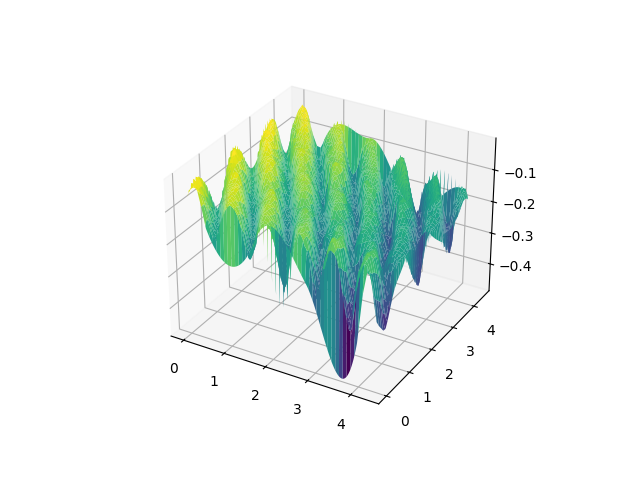

In [17]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(x, y, z, marker='.', color=line_colors)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, zi, cmap='viridis')

In [23]:
samp = np.array([0.745, 0.741, 0.763, 0.760, 0.765])
np.average(samp)

0.7548000000000001